 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

csv_path = Path("../Starter_Code/Resources/whale_returns.csv")

In [3]:
whale_returns = pd.read_csv(csv_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.count()


SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
csv_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
csv_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(csv_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", " ")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", " ")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

<ipython-input-11-85608bb3d16a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", " ")


Close    float64
dtype: object

In [12]:
sp500_history.reset_index()
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Calculate Daily Returns

returns_sp500 = sp500_history.pct_change()
returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


<AxesSubplot:xlabel='Date'>

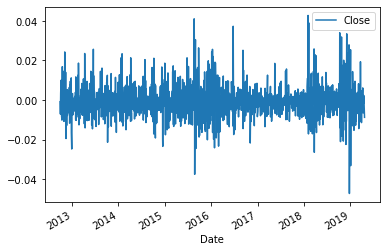

In [14]:
returns_sp500.plot()

In [15]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history = sp500_history.rename(columns={'Close': 'Closing Price'})
sp500_history.head()


,Closing Price
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

In [18]:
all_portfolios = pd.concat([whale_returns,algo_returns,returns_sp500], axis="columns", join="inner")
all_portfolios = all_portfolios.rename(columns = {"Close": "SP500 Returns"})
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

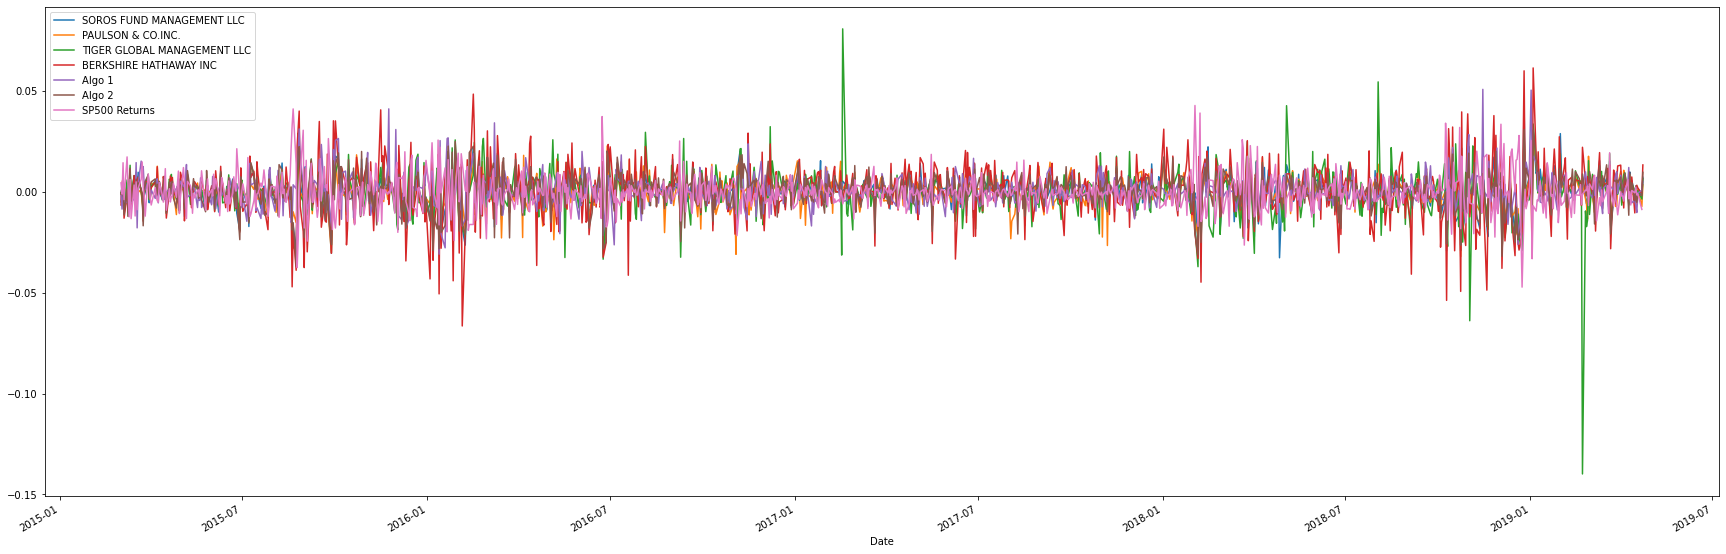

In [19]:
# Plot daily returns of all portfolios

all_portfolios.plot(figsize=(30,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

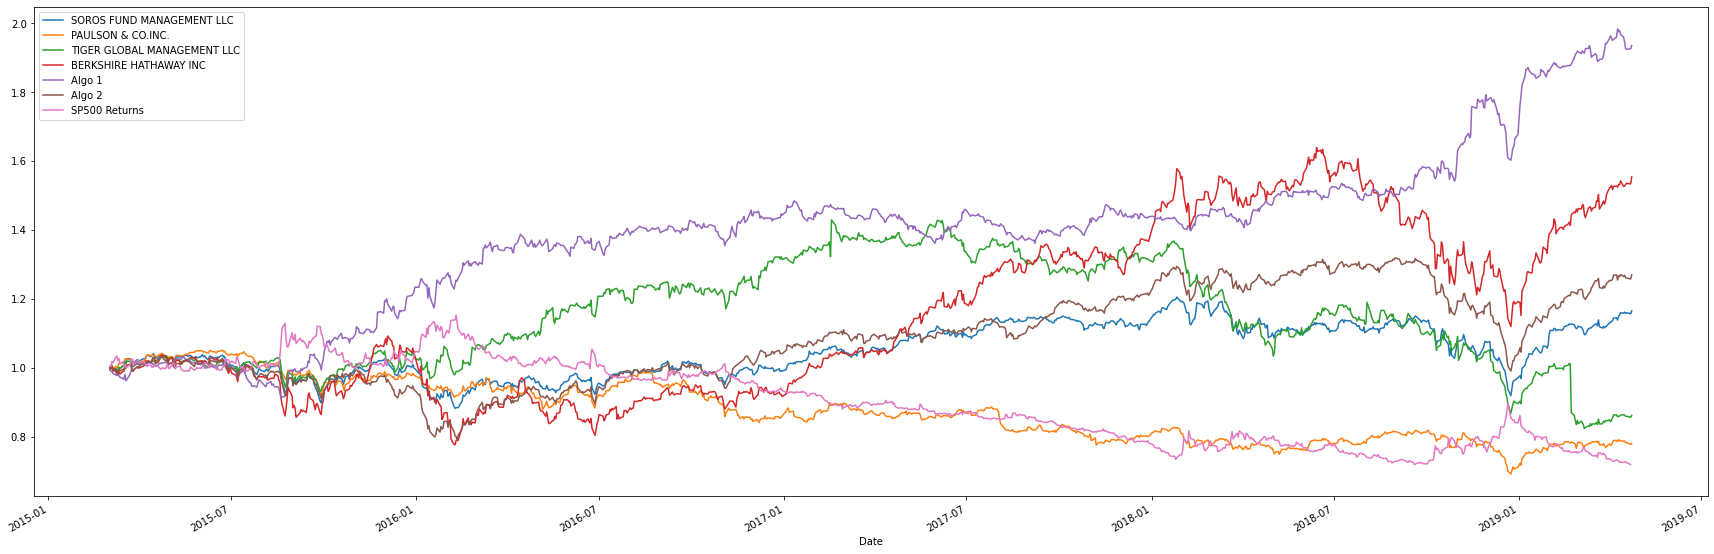

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(30,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

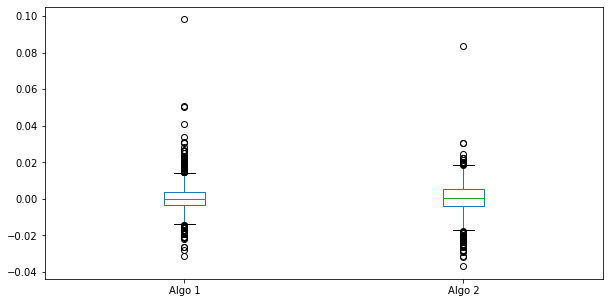

In [21]:
# Box plot to visually show risk

algo_returns.plot.box(figsize=(10,5))


### Calculate Standard Deviations

<AxesSubplot:>

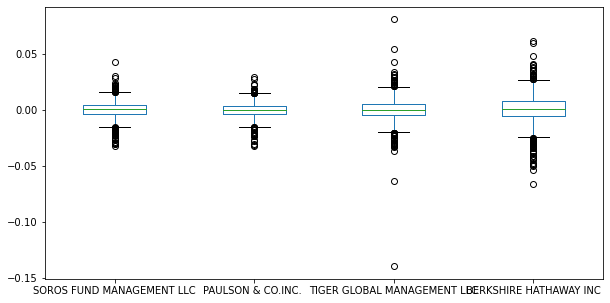

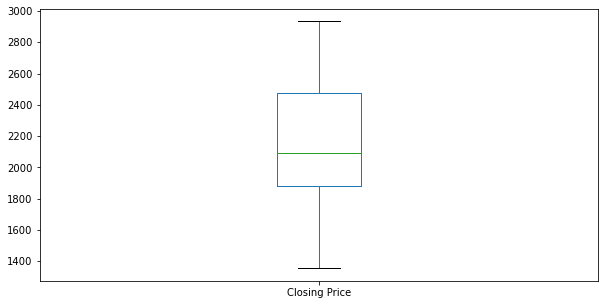

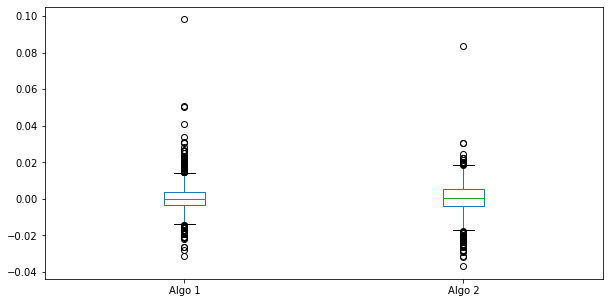

In [22]:
# Calculate the daily standard deviations of all portfolios
whale_returns.plot.box(figsize=(10,5))
sp500_history.plot.box(figsize=(10,5))
algo_returns.plot.box(figsize=(10,5))

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
cumulative_returns.std()

# Determine which portfolios are riskier than the S&P 500
sp500_history = cumulative_returns['SP500 Returns'].std()
cumulative_returns.std() < sp500_history

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
SP500 Returns                  False
dtype: bool

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)

volatility = cumulative_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True, ascending=False)
volatility

BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
TIGER GLOBAL MANAGEMENT LLC    2.378706
Algo 2                         2.090678
SP500 Returns                  1.823124
PAULSON & CO.INC.              1.404180
SOROS FUND MANAGEMENT LLC      1.162620
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

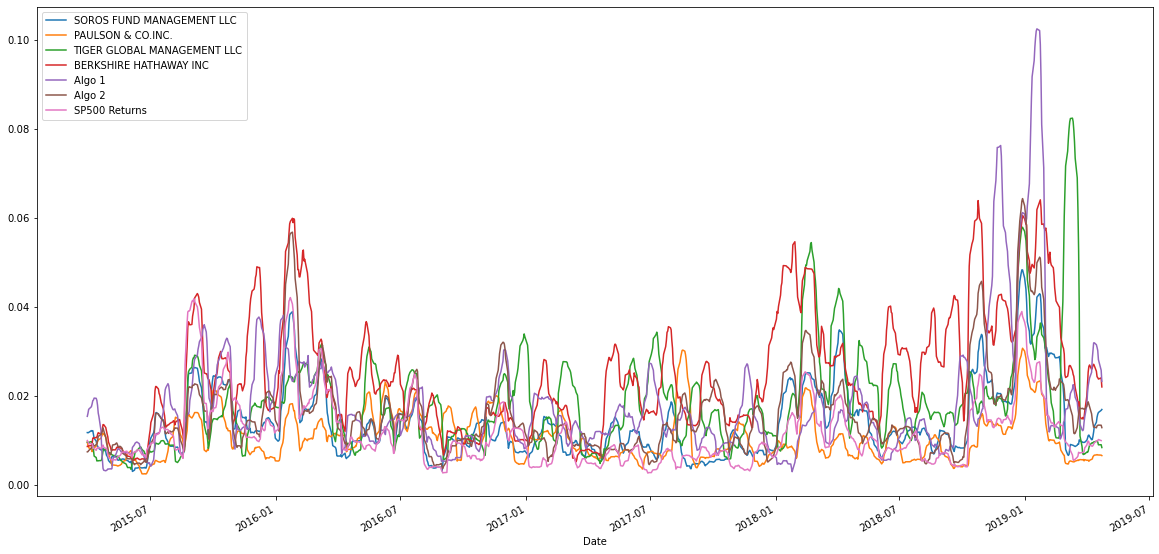

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
cumulative_returns.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = all_portfolios.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
SP500 Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 Beta'}, xlabel='Date'>

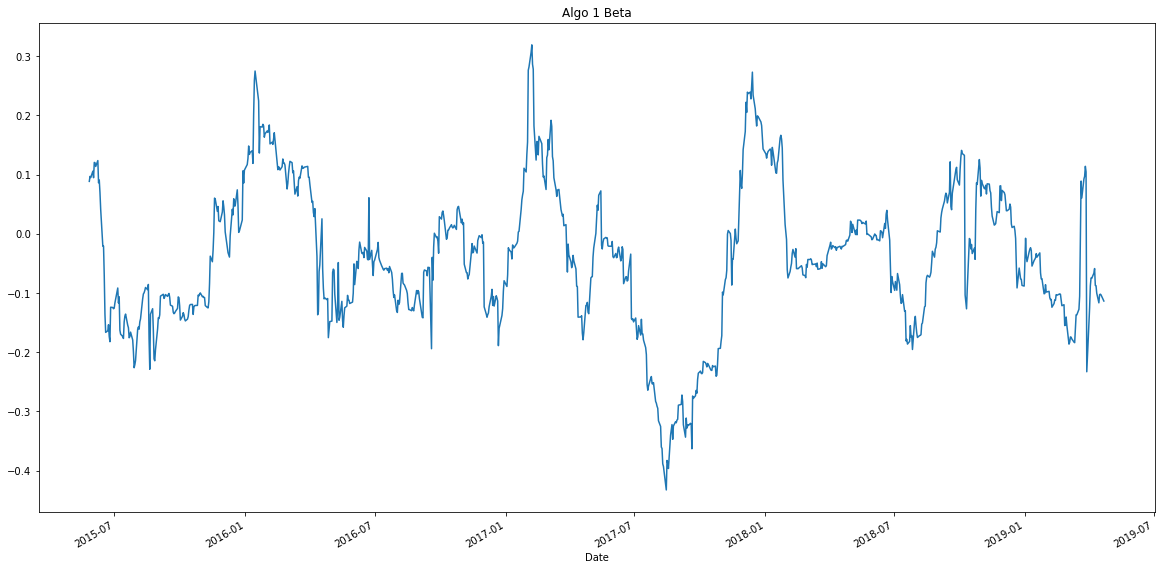

In [27]:
# Calculate covariance of a single portfolio
Algo1 = all_portfolios['Algo 1'].rolling(window=60).cov(all_portfolios["SP500 Returns"])

# Calculate variance of S&P 500
sp500_portfolio = all_portfolios['SP500 Returns'].rolling(window=60).var()


# Computing beta
beta = Algo1 / sp500_portfolio

# Plot beta trend
beta.plot(figsize=(20,10), title='Algo 1 Beta')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

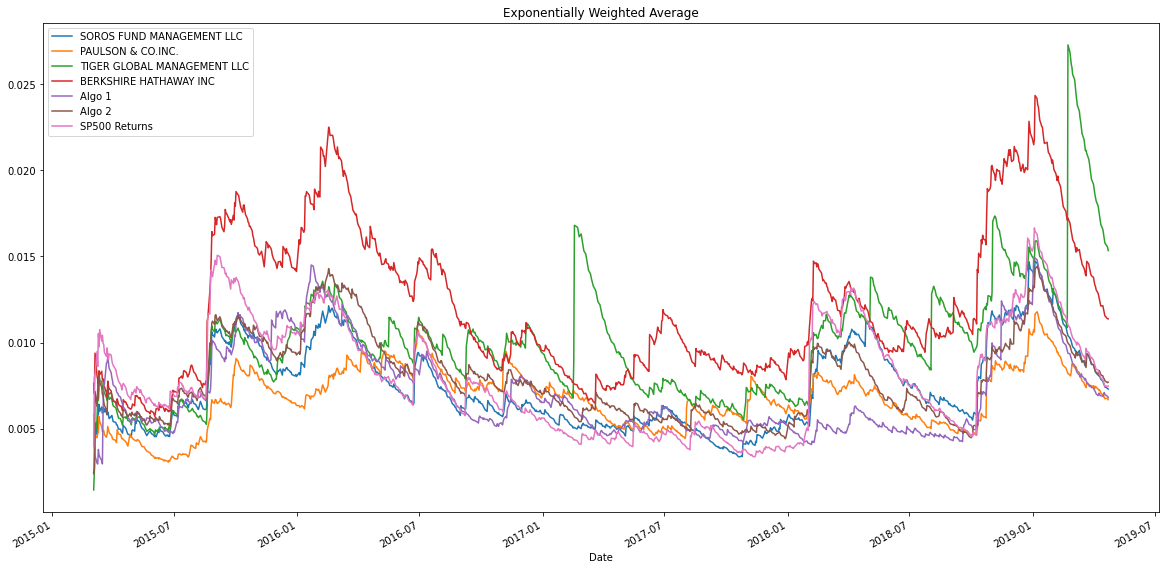

In [28]:
# Use `ewm` to calculate the rolling window
all_portfolios.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratio = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Returns                 -0.518582
dtype: float64

<AxesSubplot:>

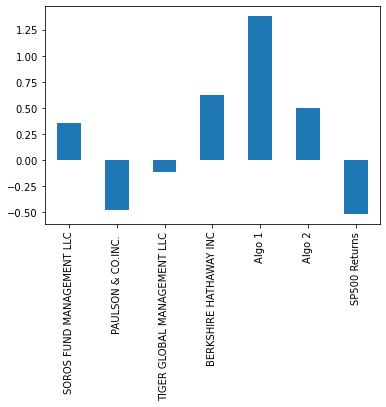

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

#Yes
---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading data from 1st stock

goog_historical = Path("../Starter_Code/Resources/goog_historical.csv")
google = pd.read_csv(goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)

google["Symbol"] = "GOOG"
google.head()




,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
# Reading data from 2nd stock
aapl_historical = Path("../Starter_Code/Resources/aapl_historical.csv")
apple = pd.read_csv(aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)

apple["Symbol"] = "AAPL"
apple.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [34]:
# Reading data from 3rd stock
cost_historical = Path("../Starter_Code/Resources/cost_historical.csv")
costco = pd.read_csv(cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)

costco["Symbol"] = "COST"
costco.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [35]:
# Combine all stocks in a single DataFrame
stock_df = pd.concat([google,apple,costco], axis='rows', join='inner')
stock_df = stock_df.reset_index()
stock_df = stock_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
stock_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
# Reset Date index
stock_df.reset_index()
stock_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [37]:
# Reorganize portfolio data by having a column per symbol
stock_df = stock_df.pivot_table(index='Trade DATE')
stock_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [39]:
# Calculate daily returns
stock_df = stock_df.pct_change()
stock_df.head()
# Drop NAs
stock_df.dropna(inplace=True)

# Display sample data
stock_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-15,2.895452,-4.331291,-11.790218
2018-05-16,-2.026877,-9.091523,-1.123479
2018-05-17,-1.677584,-0.728937,-2.249029
2018-05-18,-0.424935,-1.715895,2.857251
2018-05-21,-2.948261,-2.034567,-2.093346


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_portfolio_returns= stock_df.dot(weights) 

# Display sample data

stock_portfolio_returns.head()


Trade DATE
2018-05-15   -4.408686
2018-05-16   -4.080626
2018-05-17   -1.551850
2018-05-18    0.238807
2018-05-21   -2.358725
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
combined_stock_df = pd.concat([all_portfolios, stock_df], axis="columns", join="inner")


combined_stock_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns,AAPL,COST,GOOG
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,2.895452,-4.331291,-11.790218
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-2.026877,-9.091523,-1.123479
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-1.677584,-0.728937,-2.249029
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.424935,-1.715895,2.857251
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,-2.948261,-2.034567,-2.093346


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_stock_df.dropna(inplace=False)
combined_stock_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns,AAPL,COST,GOOG
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,2.895452,-4.331291,-11.790218
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-2.026877,-9.091523,-1.123479
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-1.677584,-0.728937,-2.249029
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.424935,-1.715895,2.857251
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,-2.948261,-2.034567,-2.093346


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annual_std = combined_stock_df.std() * np.sqrt(252)
annual_std.sort_values(ascending = False)

GOOG                           727.083989
COST                           288.301258
AAPL                           250.369885
BERKSHIRE HATHAWAY INC           0.247680
TIGER GLOBAL MANAGEMENT LLC      0.233023
SP500 Returns                    0.152613
SOROS FUND MANAGEMENT LLC        0.146987
Algo 2                           0.139843
Algo 1                           0.133988
PAULSON & CO.INC.                0.116980
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

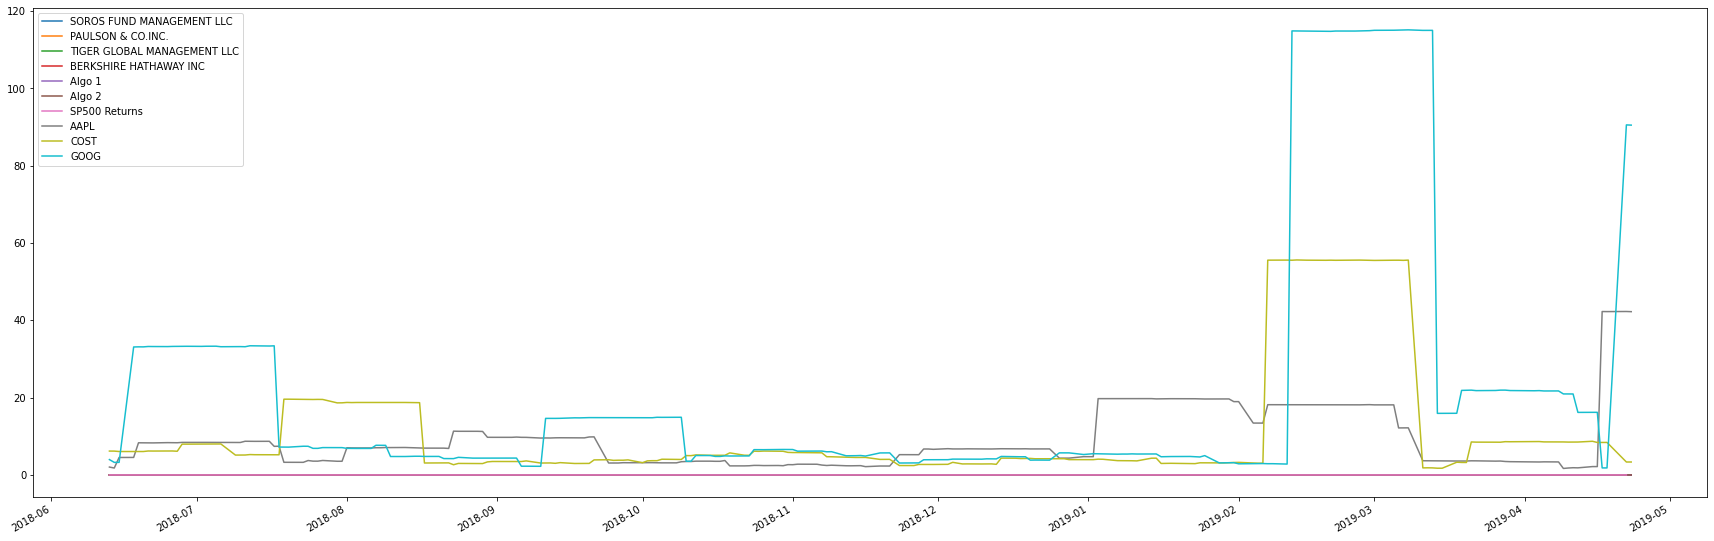

In [51]:
# Calculate rolling standard deviation
rolling__stock_std = combined_stock_df.std()* np.sqrt(252)

# Plot rolling standard deviation
combined_stock_df.rolling(window=21).std().plot(figsize = (30, 10))


### Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation
correlation_table = combined_stock_df.corr()
correlation_table 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns,AAPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478640,0.816675,0.337824,0.862928,-0.028213,-0.015298,-0.046512,-0.027814
PAULSON & CO.INC.,0.791962,1.000000,0.485385,0.650757,0.361301,0.783724,-0.059888,-0.029702,-0.089144,-0.046601
TIGER GLOBAL MANAGEMENT LLC,0.478640,0.485385,1.000000,0.325462,0.114560,0.409478,0.005674,0.009123,-0.031183,-0.028789
BERKSHIRE HATHAWAY INC,0.816675,0.650757,0.325462,1.000000,0.327000,0.782866,-0.038857,0.075436,-0.080994,-0.021225
Algo 1,0.337824,0.361301,0.114560,0.327000,1.000000,0.365552,-0.054487,-0.104915,-0.010179,-0.008359
Algo 2,0.862928,0.783724,0.409478,0.782866,0.365552,1.000000,-0.043185,0.011679,-0.072440,-0.095544
SP500 Returns,-0.028213,-0.059888,0.005674,-0.038857,-0.054487,-0.043185,1.000000,0.027468,-0.022925,-0.002115
AAPL,-0.015298,-0.029702,0.009123,0.075436,-0.104915,0.011679,0.027468,1.000000,-0.212080,0.008792
COST,-0.046512,-0.089144,-0.031183,-0.080994,-0.010179,-0.072440,-0.022925,-0.212080,1.000000,-0.032357
GOOG,-0.027814,-0.046601,-0.028789,-0.021225,-0.008359,-0.095544,-0.002115,0.008792,-0.032357,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [61]:
# Calculate and plot Beta

#stock_beta = pd.rolling_cov(df['combined_stock_df'], df['SP500_history'], window=6) / pd.rolling_var(df['stock_beta'], window=6)

rolling_stock_covariance = combined_stock_df['combined_stock_df'].rolling(window=60).cov(daily_returns['SP500'])



KeyError: 'combined_stock_df'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualzied Sharpe Ratios
stock_sharpe_ratio = (combined_stock_df.mean() * 252) / (combined_stock_df.std() * np.sqrt(252))
stock_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.431622
PAULSON & CO.INC.              0.259283
TIGER GLOBAL MANAGEMENT LLC   -1.036405
BERKSHIRE HATHAWAY INC         0.160092
Algo 1                         2.032666
Algo 2                         0.068300
SP500 Returns                 -0.477497
AAPL                           0.121038
COST                          -0.278786
GOOG                          -0.640097
dtype: float64

<AxesSubplot:>

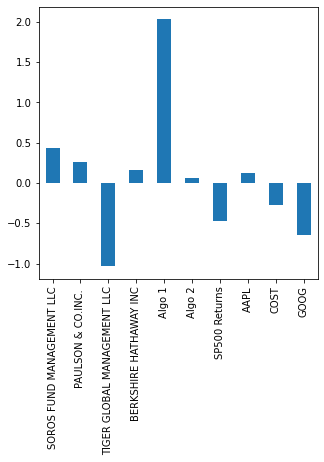

In [55]:
# Visualize the sharpe ratios as a bar plot
stock_sharpe_ratio.plot.bar(figsize=(5,5))


### How does your portfolio do?

Write your answer here!

In [ ]:
The portfolio performed well